In [2]:
import pandas as pd
import graphviz 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from six import StringIO
from IPython.display import Image
import pydotplus

In [8]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

In [32]:
data = pd.read_csv(url)
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [55]:
data.shape

(891, 12)

In [42]:
data.isnull().values.any()

True

In [43]:
data.isnull().sum().sum()

866

In [33]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [34]:
data['Sex'].replace('male', 0, inplace = True)
data['Sex'].replace('female', 1, inplace = True)

In [35]:
data['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [44]:
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886                              Montvila, Rev. Juozas    0  27.0      0   
887                       Graham, Miss. Margaret Edith    1  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"    1   NaN      1   
889                              Behr, Mr. Karl Howell    0  26.0      0   
890                                Dooley, Mr. Patrick    0  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [90]:
data.iloc[302]

PassengerId                                303
Survived                                     0
Pclass                                       3
Name           Johnson, Mr. William Cahoone Jr
Sex                                          0
Age                                       19.0
SibSp                                        0
Parch                                        0
Ticket                                    LINE
Fare                                       0.0
Cabin                                      NaN
Embarked                                     S
Name: 302, dtype: object

In [51]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
# data.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [47]:
data['Age'].isnull().sum()

177

In [58]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [59]:
data['Age'].isnull().sum()

0

In [60]:
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch' , 'Fare']]
y = data['Survived']

In [24]:
# X

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 355)

In [62]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [1]:
X_train

NameError: name 'X_train' is not defined

In [92]:
feature_name = list(X.columns)
class_name = list(y_train.unique())
feature_name

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

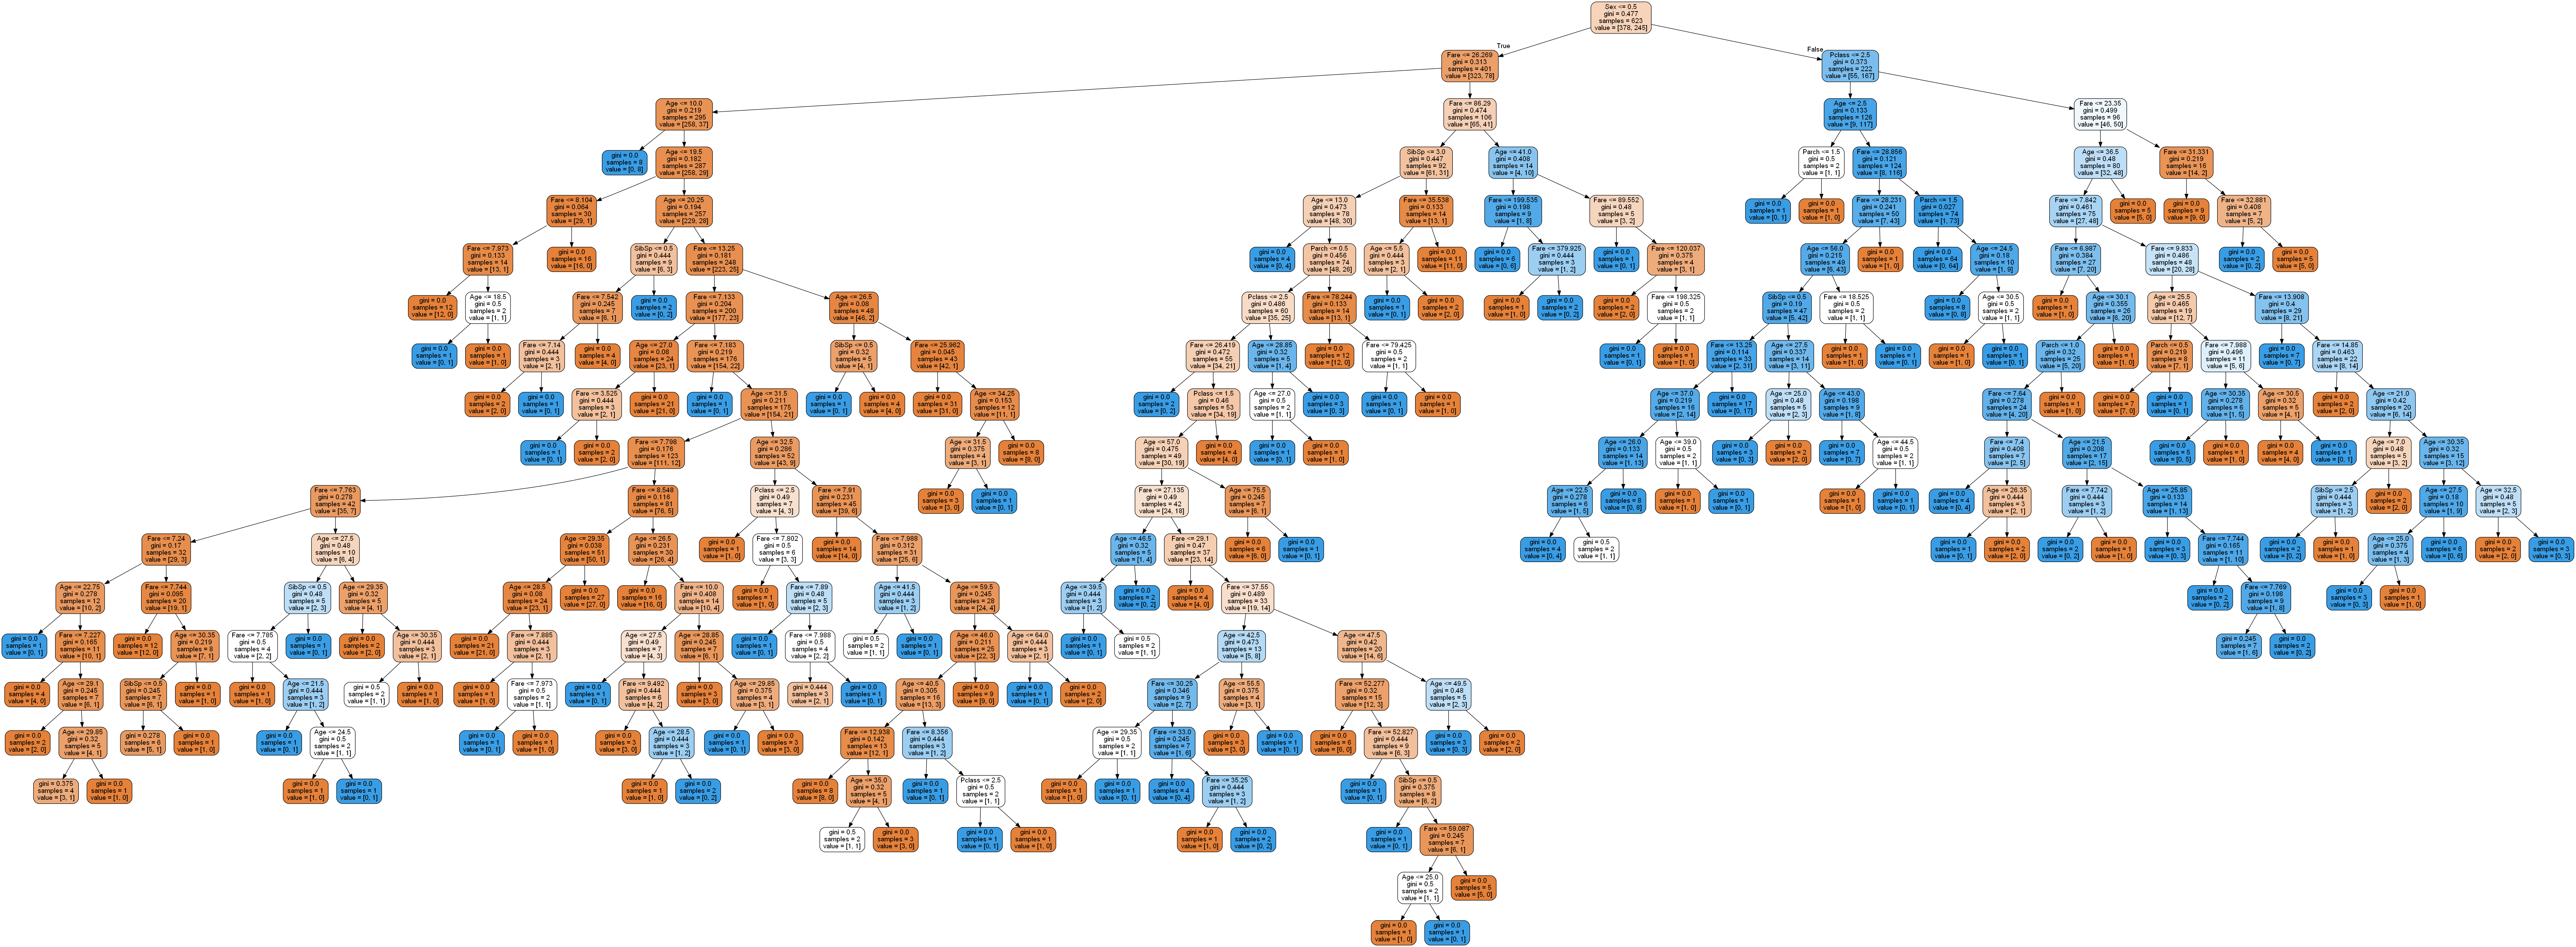

In [67]:
# create a dot-file which stores a tree structure
dot_data = export_graphviz(clf, feature_names = feature_name, rounded = True, filled = True)
#Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("myassignTree.png")
#show graph
Image(graph.create_png())

In [68]:
clf.score(X_test, y_test)

0.7574626865671642

In [69]:
pred = clf.predict(X_test)

In [87]:
X_test

Pclass  Sex   Age  SibSp  Parch      Fare
426       2    1  28.0      1      0   26.0000
302       3    0  19.0      0      0    0.0000
383       1    1  35.0      1      0   52.0000
355       3    0  28.0      0      0    9.5000
678       3    1  43.0      1      6   46.9000
..      ...  ...   ...    ...    ...       ...
294       3    0  24.0      0      0    7.8958
519       3    0  32.0      0      0    7.8958
800       2    0  34.0      0      0   13.0000
208       3    1  16.0      0      0    7.7500
373       1    0  22.0      0      0  135.6333

[268 rows x 6 columns]

In [91]:
X_test.iloc[267]

Pclass      1.0000
Sex         0.0000
Age        22.0000
SibSp       0.0000
Parch       0.0000
Fare      135.6333
Name: 373, dtype: float64

In [81]:
X_test.iloc[0]

Pclass     2.0
Sex        1.0
Age       28.0
SibSp      1.0
Parch      0.0
Fare      26.0
Name: 426, dtype: float64

In [94]:
scalar = StandardScaler()

X_transform = scalar.fit_transform(X)

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X_transform,y,test_size = 0.30, random_state= 355)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

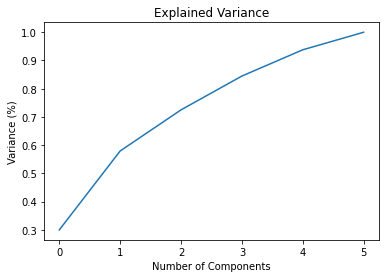

In [96]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(X_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [108]:
pca = PCA(n_components=6)
new_data = pca.fit_transform(X_transform)

principal_X = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6'])

In [109]:
principal_X

PC-1      PC-2      PC-3      PC-4      PC-5      PC-6
0   -0.926296 -0.895259  0.557193  0.347665 -0.373523  0.116365
1    1.497933  1.339850 -0.728178 -0.011950 -1.017527 -0.352668
2   -0.449617 -0.505489 -1.599096 -0.078296 -0.319100  0.411057
3    1.302467  1.103392 -0.826647  0.032045 -1.019646 -0.638295
4   -1.310593  0.038177  0.295140 -0.280385  0.122964  0.425768
..        ...       ...       ...       ...       ...       ...
886 -0.771675  0.391841  0.292556  0.472903  0.159551 -0.489017
887  0.737753  0.658127 -1.468480  0.976265 -0.305902 -1.113185
888  1.253125 -1.490482 -0.818409 -1.298678  0.759363  0.226881
889 -0.118524  1.115808  0.405303  0.894113  0.153530 -1.132737
890 -1.304810 -0.091472  0.264036 -0.101330  0.148840  0.372910

[891 rows x 6 columns]

In [110]:
# let's see how well our model perform on this new data
X_train,X_test,y_train,y_test = train_test_split(principal_X,y,test_size = 0.30, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7126865671641791

In [71]:
pred1 = clf.predict([X_test.iloc[0]])
pred1

array([1], dtype=int64)

In [72]:
# we are tuning three hyperparameters right now, we are passing the different values for both para
grid_param = {
    'criterion' : ['gini', 'entropy'], 
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split' : range(2,10,1),
    'splitter' : ['best', 'random']
}

In [73]:
grid_search = GridSearchCV(estimator = clf, param_grid = grid_param,
                          cv = 5, n_jobs = -1)

In [74]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [75]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 8, 'splitter': 'random'}


In [76]:
grid_search.best_score_

0.8266193548387097

In [77]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, min_samples_leaf = 3, min_samples_split = 8, splitter = 'random')
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=8,
                       splitter='random')

In [78]:
clf.score(X_test, y_test)

0.7873134328358209

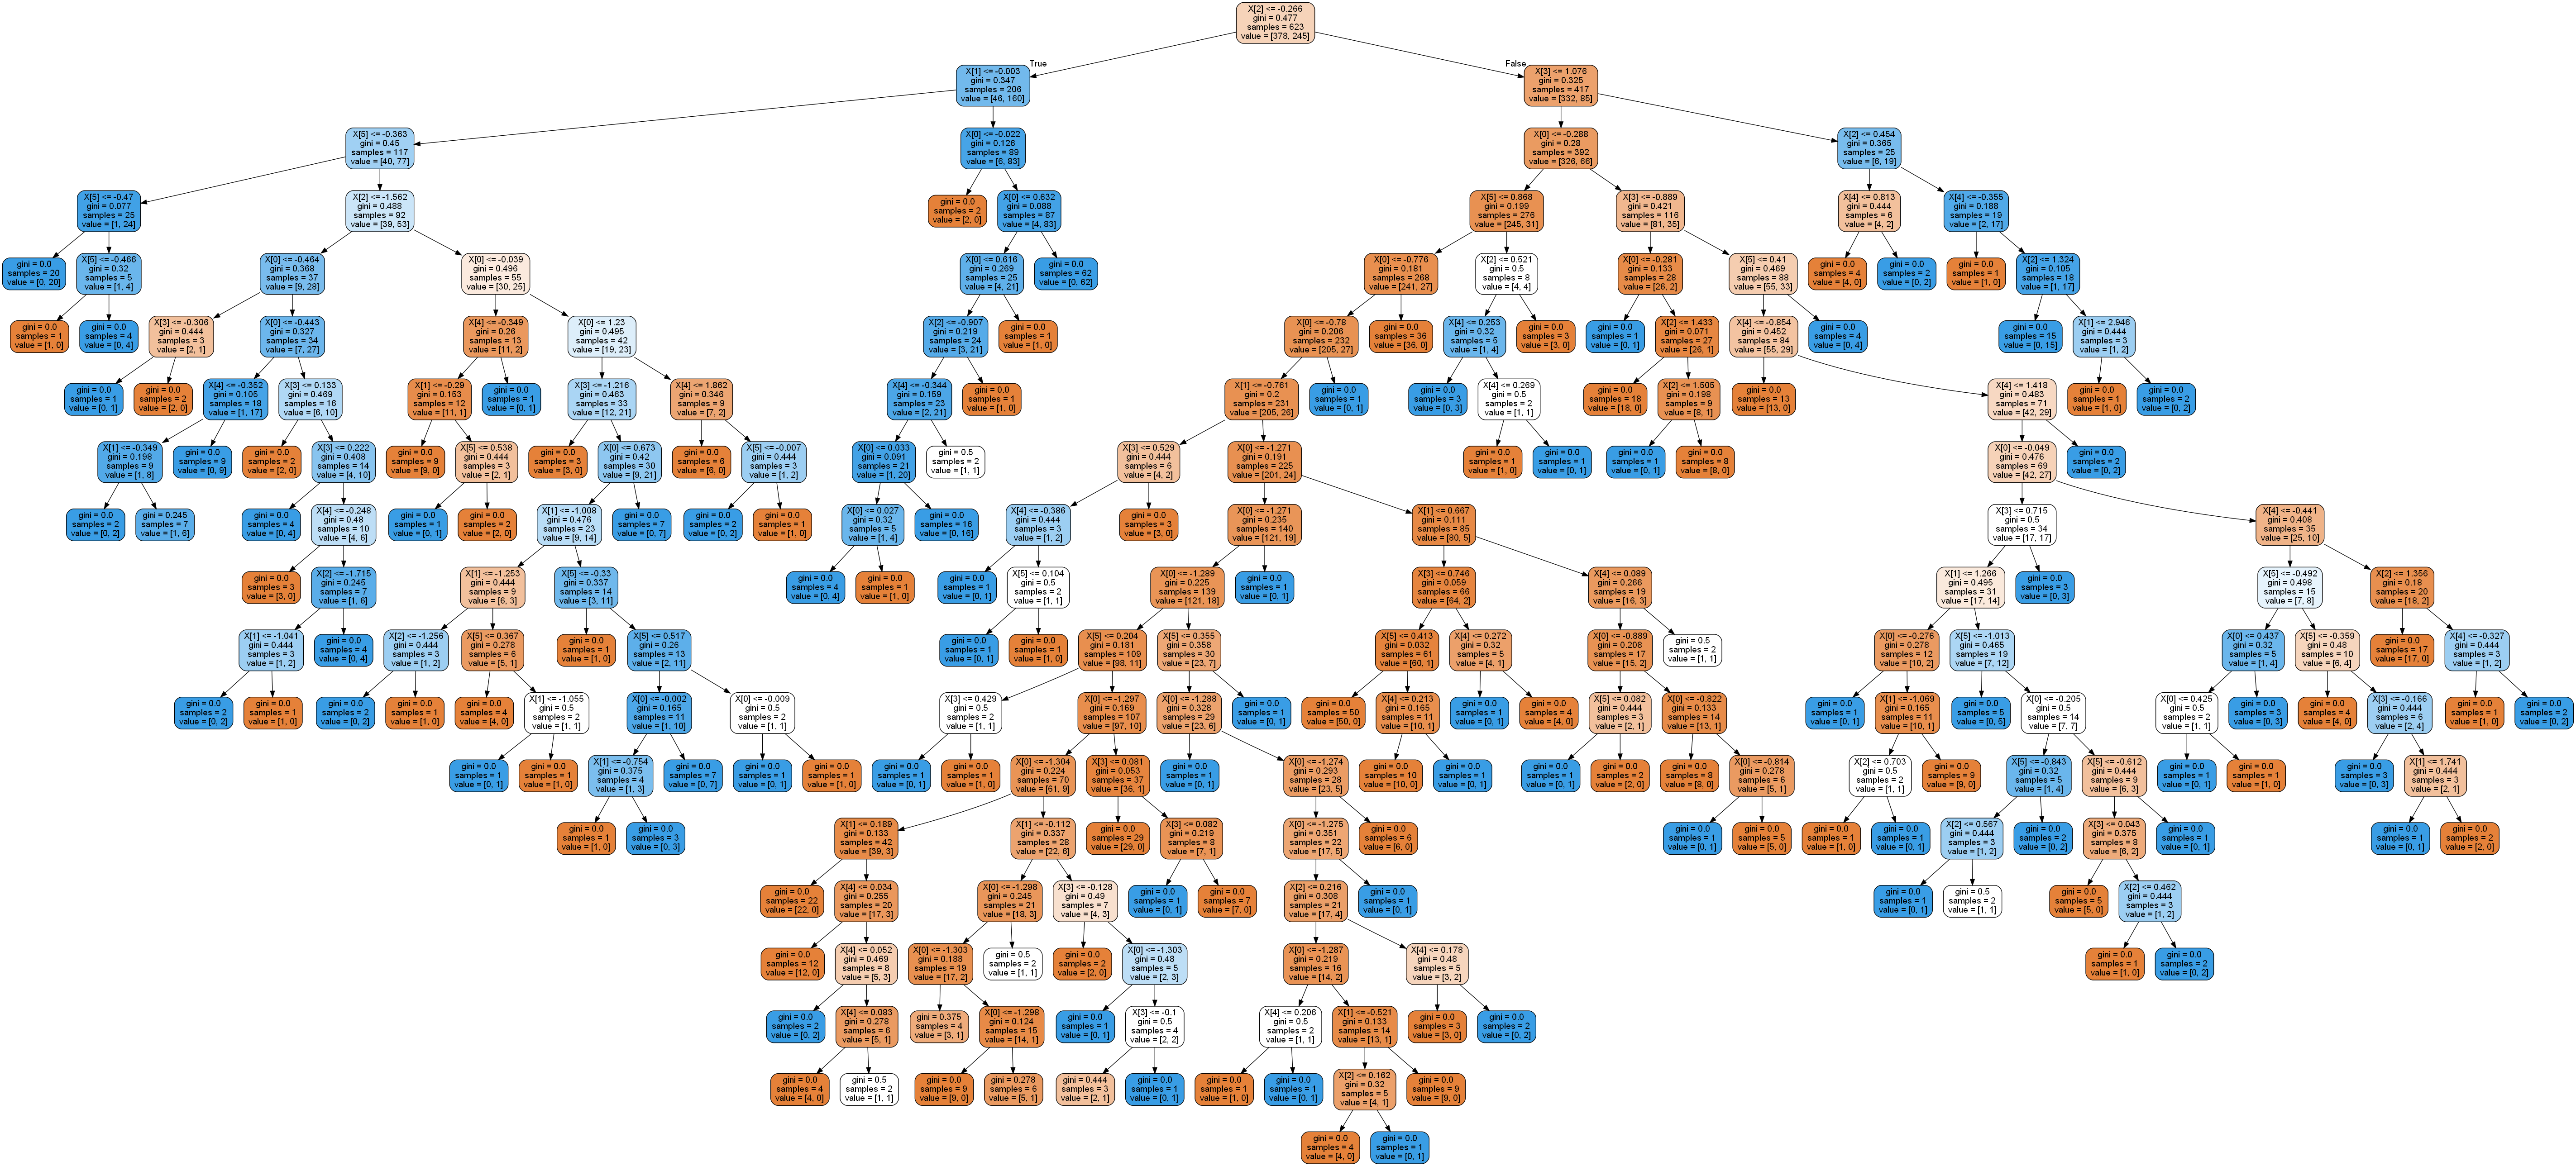

In [111]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())

In [112]:
# let's save the model
import pickle
with open('modelFordec_tree_Prediction.sav', 'wb') as f:
    pickle.dump(clf,f)
with open('dectree_standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

with open('dectree_pca_model.sav', 'wb') as f:
    pickle.dump(pca,f)